# ML 분반 Week3 (Classification) 과제
## 제출자: 박민지

# Red Wine Quality Classification

## 데이터 소개

UCI Machine Learning

TASK : Red wine Classification

csv 파일의 컬럼은 아래와 같습니다.

*   index : 구분자
*   quality : 품질
*   fixed acidity : 산도
*   volatile acidity : 휘발성산
*   citric acid : 시트르산
*   residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
*   chlorides : 염화물
*   free sulfur dioxide : 독립 이산화황
*   total sulfur dioxide : 총 이산화황
*   density : 밀도
*   pH : 수소이온농도
*   sulphates : 황산염
*   alcohol : 도수
*   type : 종류



In [1]:
# 구글 드라이브에 코랩을 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [3]:
# loading data ,your own file path
df = pd.read_csv('/content/drive/MyDrive/KUBIG_ML/winequality-red.csv', sep = ';')

##EDA(Exploratory Data Analysis)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##Q1 Data brief review : info() 함수를 통해 알아낼 수 있는 정보를 작성하시오. (**빈칸 ## 4개를 채우시오**)


답: It turns out that the dataset does not have (**missing**) values. The dataset consists of (**1599**) rows and (**12**) columns. The data type of all variables are (**float64 or int64**).



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##Q2 결측치 확인
결측치가 존재한다면, 이를 처리하는 방법에 대해 알아보고 처리해보세요.

결측치는 판단에 따라 drop(제거) 할 수 있고, 특정 값으로 채울(대체) 수 있습니다.

데이터를 채우는 방법으로는 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts() 등으로 처리합니다.

In [7]:
# 결측치 확인
## df의 결측치의 총 합을 확인하는 코드를 작성하세요. sum()을 2번 사용하시오.

print("Totally there are {} null values in the dataset".format(df.isnull().sum()))

Totally there are fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64 null values in the dataset


In [8]:
# 결측치 확인
## df의 결측치의 총 합을 확인하는 코드를 작성하세요. sum()을 2번 사용하시오.

print("Totally there are {} null values in the dataset".format(df.isnull().sum().sum()))

Totally there are 0 null values in the dataset


## Q3 데이터 분포 확인
각 변수의 데이터 분포가 어떠한지 기술하시오.(맨 위의 세개의 변수에 대해서만 기술)

1. 'fixed_acidity' (산도) : 대부분 값이 평균 근처(6에서 10사이)의 값을 가지지만 오른쪽으로 꼬리가 긴 분포(positive skewness)형태이므로 산도가 평균보다 높은 값을 가지는 경우가 존재함.

2. 'volatile_acidity'(휘발성 산) :오른쪽으로 꼬리가 긴 분포(positive skewness)를 갖고 있어서 평균보다 높은 값을 가지는 경우가 존재함. fixed_acidity보다 평균을 기준으로 분포가 넓게 퍼져 있어서 변동이 더 큰 편임.

3. 'citric_acid'(시트르산) : 앞선 두 변수와 다르게 데이터가 특정 값에 집중되어 있지 않음

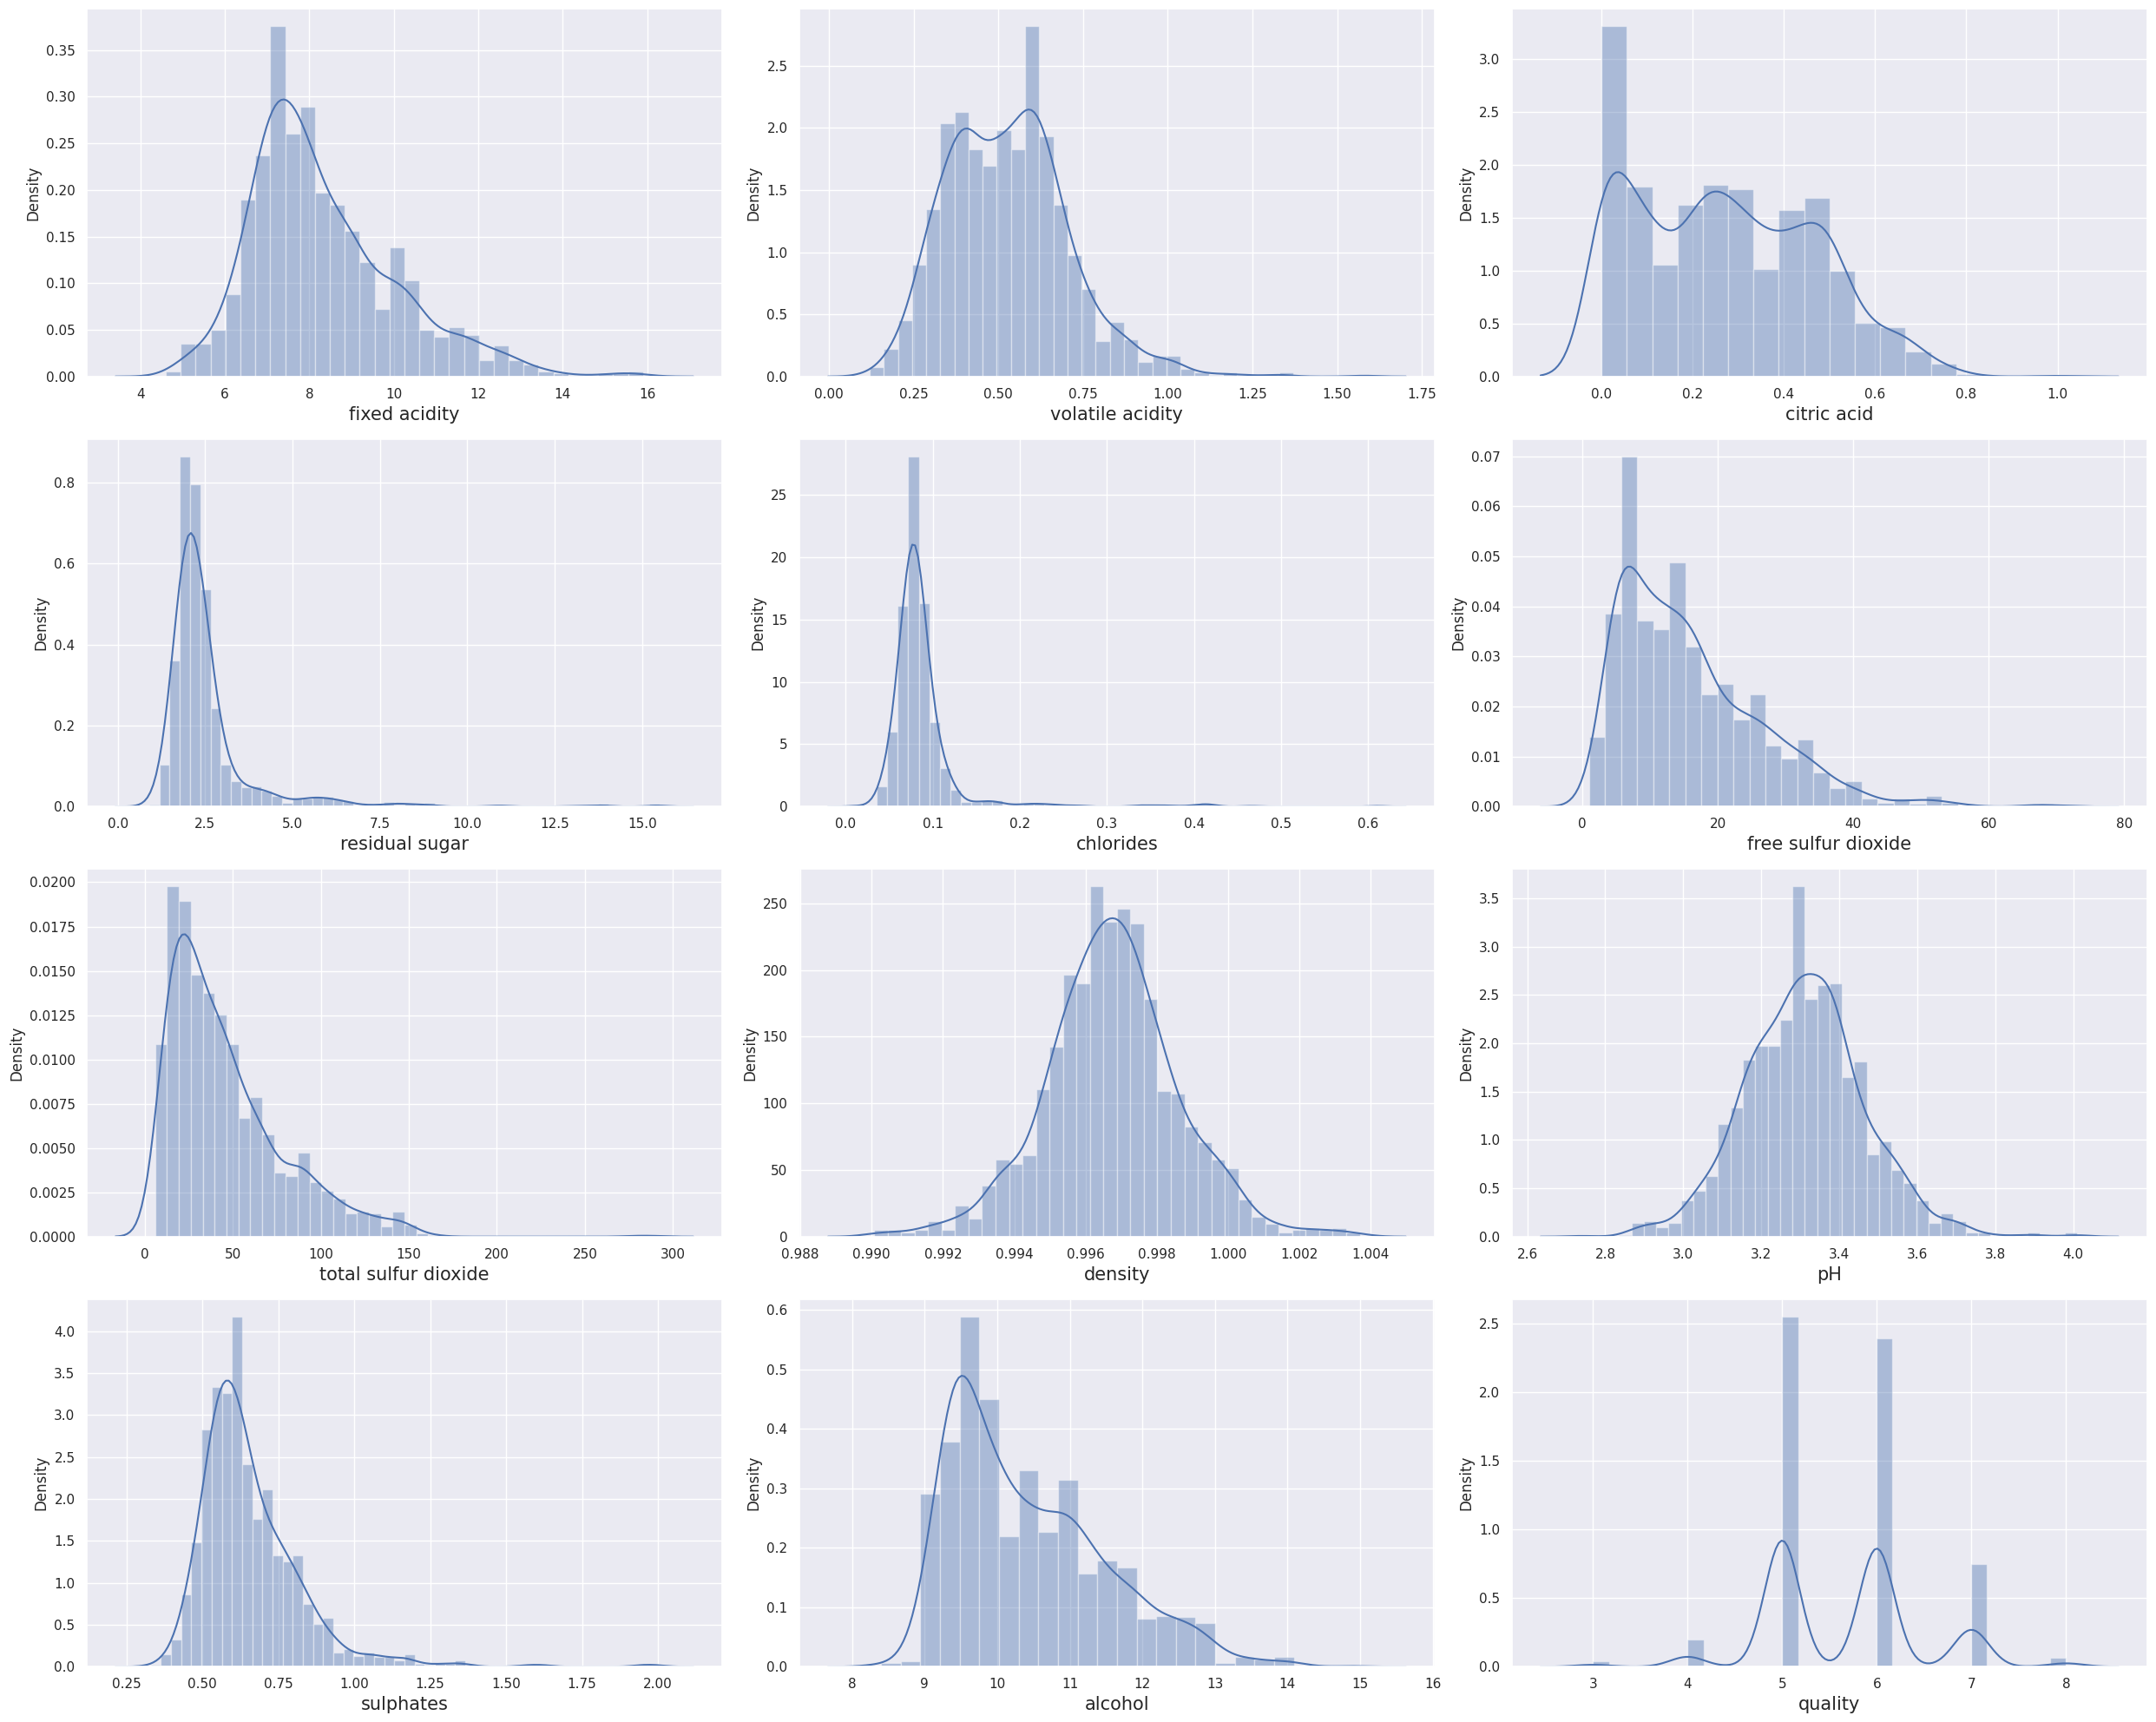

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

##Q4. correlation plot을 그리고, 해당 plot에서 얻은 인사이트를 정리해보세요.

더불어 multicollinearity(통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제)에 주목하여, 해당 correlation plot에서 어떤 영향을 주고 있는지 있는지 예를 들어 기술하시오.

답:



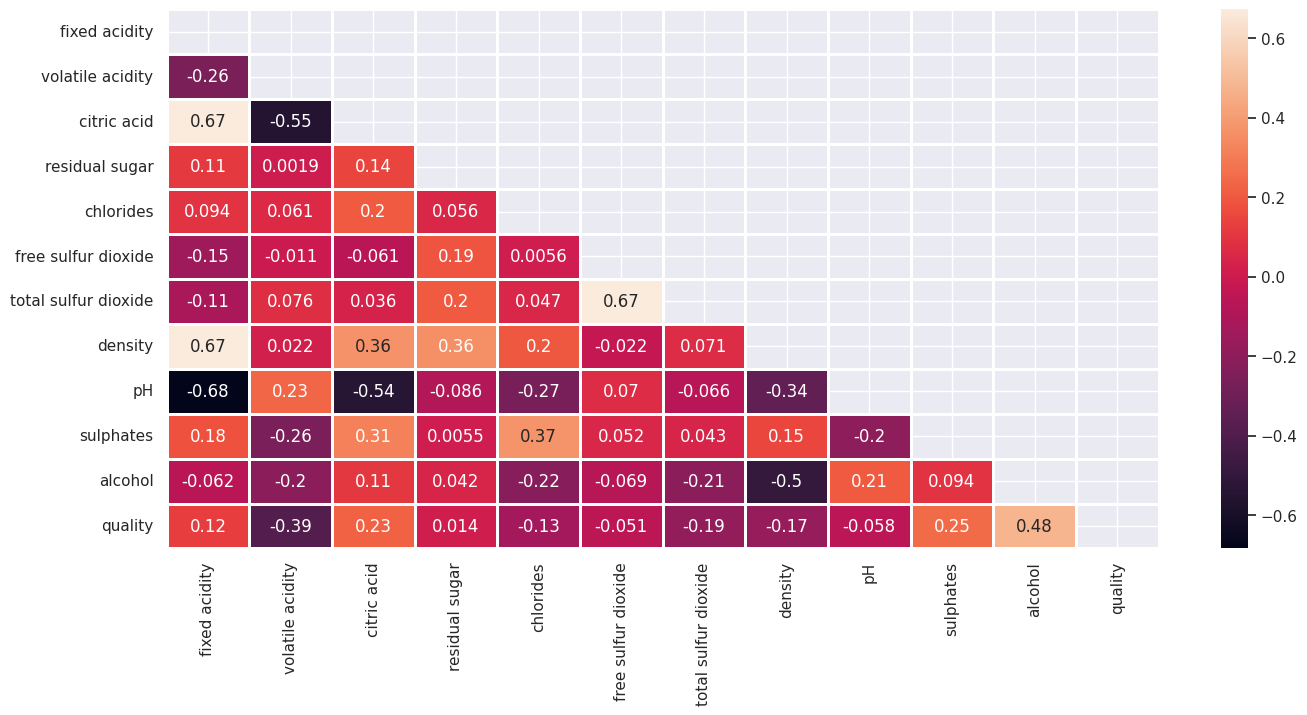

In [10]:
# 상관관계 plot
plt.figure(figsize = (16, 7))

corr = df.corr()
##에 들어갈 코드를 작성하시오.
mask = np.triu(np.ones_like(corr, dtype = bool)) #upper -> true

sns.heatmap(corr, mask = mask, annot = True, fmt = '0.2g', linewidths = 1)
plt.show()

In [11]:
#Pearson correlation coefficient
import scipy.stats as st
print("Pearson correlation coefficient:", st.pearsonr(df["alcohol"],df["density"]))
print("Pearson correlation coefficient:", st.pearsonr(df["free sulfur dioxide"],df["total sulfur dioxide"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["citric acid"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"],df["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.4961797702417016, pvalue=3.9388353399881845e-100)
Pearson correlation coefficient: PearsonRResult(statistic=0.6676664504810215, pvalue=6.40472295468106e-207)
Pearson correlation coefficient: PearsonRResult(statistic=-0.6829781945685314, pvalue=4.063034039843752e-220)
Pearson correlation coefficient: PearsonRResult(statistic=-0.5419041447395097, pvalue=1.007201325911493e-122)
Pearson correlation coefficient: PearsonRResult(statistic=0.6680472921189734, pvalue=3.0747470608605733e-207)


##Q5. Divide quality range into 2 parts
In this dataset quality range is between 3 and 8
We will divide quality range into two parts:



*   High quality wine: 6 - 8
*   Low quality wine: 3 - 5



In [12]:
df["quality"] = df["quality"].apply(lambda x: 1 if x >= 6 else 0)
##에 들어갈 코드를 작성하시오.
df["quality"]

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [13]:
df.head().style.background_gradient(cmap = "Reds")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,1
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0


##Q6. 종속변수(y,label)은 무엇이 되어야 하나요?


In [14]:
# we select dependent variable (label)
y = df["quality"] ##을 채우시오.

# we select independent variable
x = df.drop('quality', axis = 1) ##을 채우시오.

In [15]:
# splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)

##Q7.왜 Standardization(StandardScaler, MinMaxScaler 등) 사용할까요? 두 Scaler의 특징에 대해 조사하고, 보다 적절한 Scaler가 무엇일지 그 이유와 함께 적어주세요.

답 :

**StandardScaler : 각 변수 값들의 평균을 0, 표준편차를 1로 변환**
- 데이터가 정규분포를 따를 때 유리함.  
- 평균과 표준편차를 계산하기 때문에 이상치가 많지 않을 때 유리함.

**MinMaxScaler : 각 변수 값을 0과 1사이의 값으로 변환**
- 데이터 분포가 일정하지 않을 때 사용.  
- 이상치에 영향을 받지 않음.

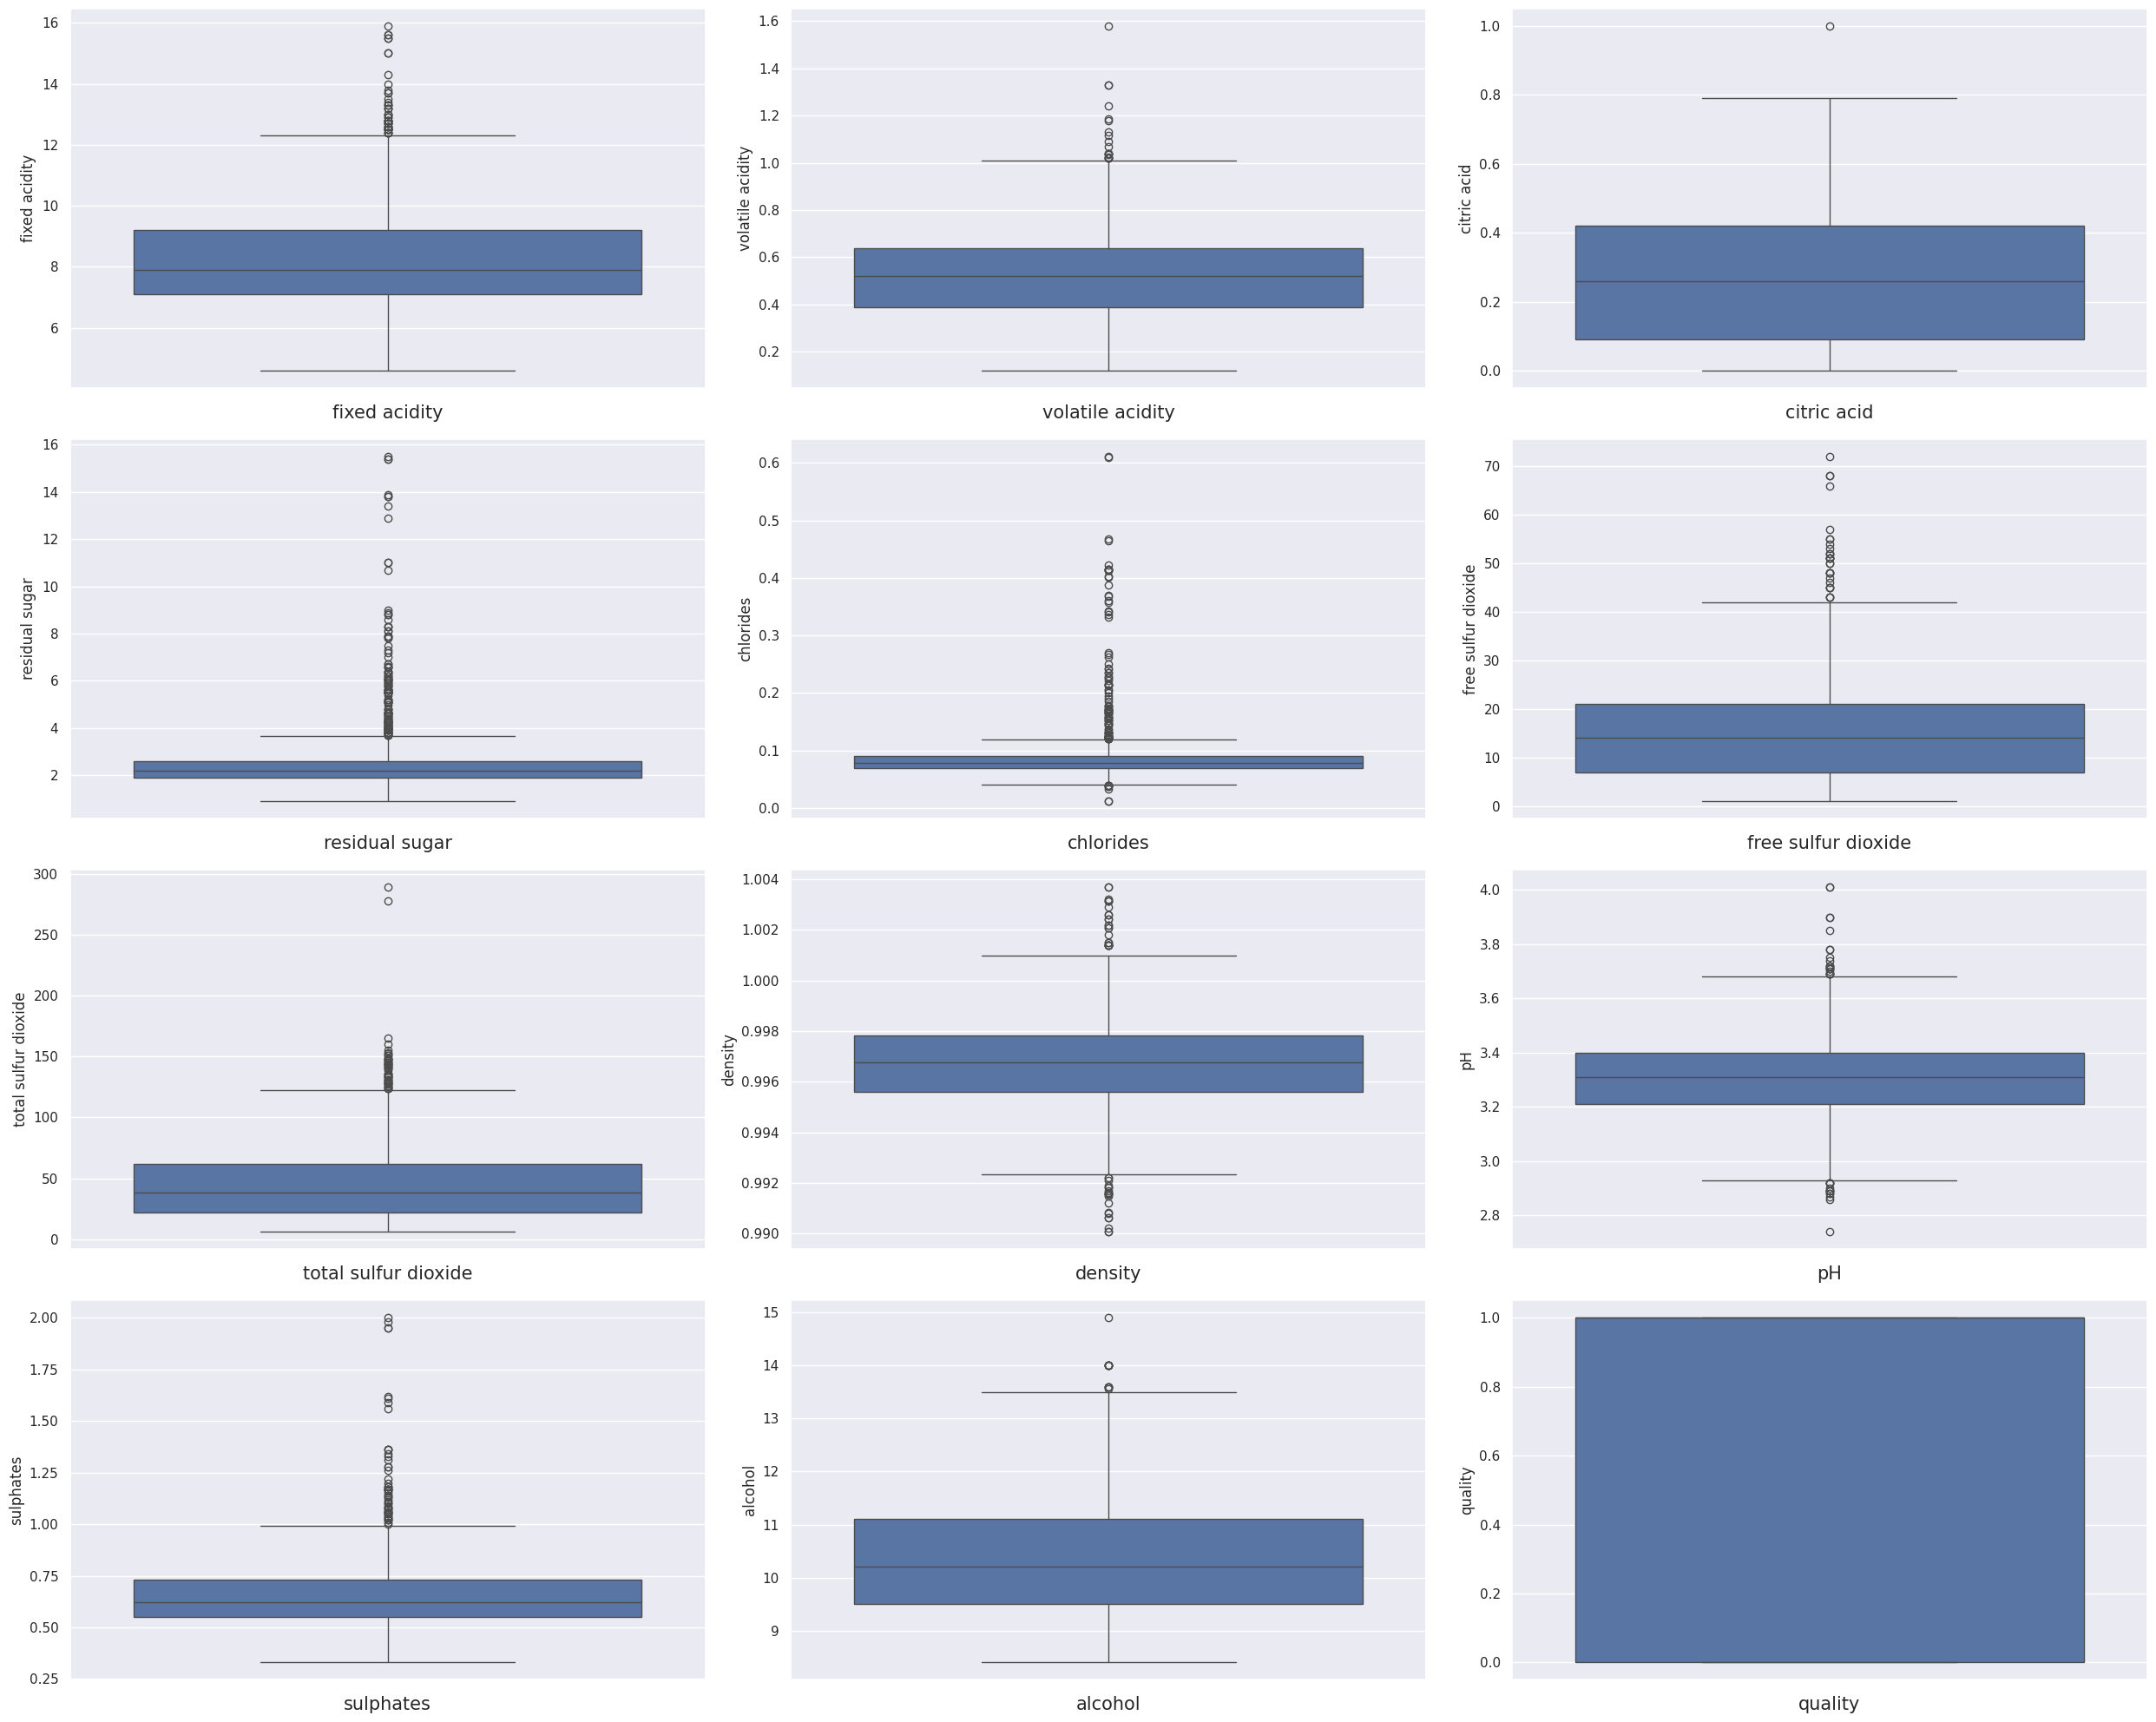

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()


* 극단치 존재
* 일정하지 않은 분포

-> MinMaxScaler

In [17]:
# scaling data
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler(feature_range=(0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

##Q7-5. 위의 코드에서, train dataset에 대해서는 fit_transform을, test dataset에 대해서는 transform을 실시하는 이유가 무엇일지 조사해주세요.
답 :

**fit : 데이터셋의 통계를 계산하는 메소드**
- StandardScaler의 경우 평균과 표준편차 계산
- MinMaxScaler의 경우 최소값과 최대값 계산

**transform : 계산된 결과로 데이터를 변환하는 메소드**

**fit_transform : fit과 transform을 한번에 수행**

-> 스케일링 대상인 train dataset은 fit_transform으로 계산과 변환을 한번에 수행하고 일관성 있는 분석을 위해서 test data도 transform을 취해줌




In [18]:
print(x_train[0:5])
print("\n")
print(x_train.shape)
print("_________________________________________________________________________")
print(x_test[0:5])
print("\n")
print(x_test.shape)

[[0.23893805 0.1369863  0.23       0.10769231 0.090301   0.47887324
  0.23529412 0.4441896  0.54330709 0.17365269 0.26153846]
 [0.32743363 0.38013699 0.26       0.09230769 0.12040134 0.14084507
  0.13602941 0.57568807 0.4488189  0.11976048 0.12307692]
 [0.69911504 0.17808219 0.6        0.13076923 0.11538462 0.42253521
  0.24264706 0.72859327 0.28346457 0.23952096 0.32307692]
 [0.36283186 0.44178082 0.22       0.10769231 0.08695652 0.11267606
  0.13235294 0.47629969 0.28346457 0.13173653 0.15384615]
 [0.32743363 0.49657534 0.01       0.1        0.09698997 0.05633803
  0.02941176 0.50688073 0.45669291 0.1497006  0.4       ]]


(1199, 11)
_________________________________________________________________________
[[0.37168142 0.19863014 0.64       0.1        0.13545151 0.11267606
  0.13235294 0.65214067 0.62992126 0.19760479 0.32307692]
 [0.36283186 0.34931507 0.28       0.13846154 0.14046823 0.22535211
  0.23161765 0.5558104  0.40944882 0.17964072 0.27692308]
 [0.51327434 0.15068493 0.58  

In [19]:
print(y_train.head())
print(y_train.shape)
print("___________________________")
print(y_test.head())
print(y_test.shape)

1144    0
73      0
446     0
399     0
647     0
Name: quality, dtype: int64
(1199,)
___________________________
75      0
1283    1
408     1
1281    1
1118    1
Name: quality, dtype: int64
(400,)


##Q8. Building Classification models

이번 코드에서는 non parametric model; knn을 사용하여 train, test 진행해보았습니다.

아래의 코드 외에도 원하는 한가지 classification 모델(KNN 제외)을 선정하여 아래의 과정을 반복하고, 그 결과를 해석하세요. grid search 과정은 거치지 않고 임의의 파라미터값으로 진행해도 좋습니다.

In [20]:
##아래의 과정을 반복하시오.

###랜덤포레스트

In [21]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# #KNN

# knn = KNeighborsClassifier()

# knn_params = {"n_neighbors": np.arange(2, 50),
#              "weights": ["uniform", "distance"],
#              "leaf_size": [25, 30, 25]}

# knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
# knn_cv_model.fit(x_train, y_train)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier()

rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],

}

rf_cv_model = GridSearchCV(rf, rf_params, cv=5, verbose=2)

# 훈련 데이터로 모델 학습
rf_cv_model.fit(x_train, y_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END m

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
# # Knn
# print("Best score for train set: " + str(knn_cv_model.best_score_))

# print("____________________________________________")

# print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
#      "\nbest weights: " + knn_cv_model.best_params_["weights"],
#      "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

In [25]:
#rf
print("Best score for train set: " + str(rf_cv_model.best_score_))

print("____________________________________________")

print("Best number of trees (n_estimators): " + str(rf_cv_model.best_params_["n_estimators"]),
     "\nBest maximum depth (max_depth): " + str(rf_cv_model.best_params_["max_depth"]),
     "\nBest minimum samples split (min_samples_split): " + str(rf_cv_model.best_params_["min_samples_split"]),
     "\nBest minimum samples leaf (min_samples_leaf): " + str(rf_cv_model.best_params_["min_samples_leaf"]),)


Best score for train set: 0.7998221757322177
____________________________________________
Best number of trees (n_estimators): 300 
Best maximum depth (max_depth): None 
Best minimum samples split (min_samples_split): 5 
Best minimum samples leaf (min_samples_leaf): 1


In [ ]:
# #knn
# knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
#                                 leaf_size = knn_cv_model.best_params_["leaf_size"],
#                                 weights = knn_cv_model.best_params_["weights"])

# knn_model.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=21, weights='distance')

In [27]:
#rf
rf_model = RandomForestClassifier(n_estimators=rf_cv_model.best_params_["n_estimators"],
                                  max_depth=rf_cv_model.best_params_["max_depth"],
                                  min_samples_split=rf_cv_model.best_params_["min_samples_split"],
                                  min_samples_leaf=rf_cv_model.best_params_["min_samples_leaf"])

# 모델 학습
rf_model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=300)

In [ ]:
# #knn
# from sklearn.metrics import accuracy_score
# y_pred = knn_model.predict(x_test)
# print("Accuracy:",accuracy_score(y_test, y_pred)) #Validation Set Accurac

Accuracy: 0.8025


In [28]:
#rf
from sklearn.metrics import accuracy_score

y_pred = rf_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))  # Validation Set Accuracy

Accuracy: 0.81


In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       188
           1       0.82      0.80      0.81       212

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       188
           1       0.84      0.80      0.82       212

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



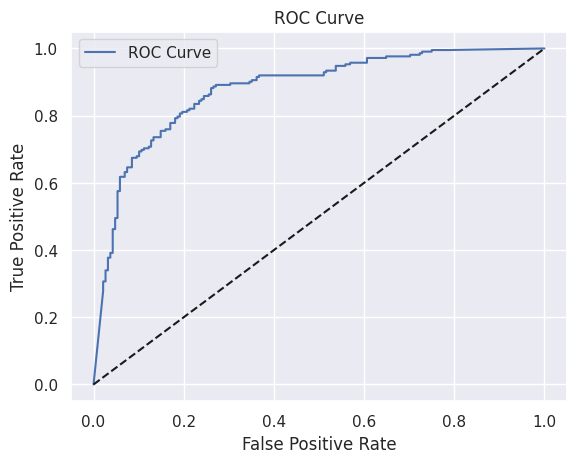

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score
# # Validation Set 에 대한 예측확률 계산
# y_prob = knn_model.predict_proba(x_test)[:,1]

# # ROC Curve
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# plt.plot(fpr, tpr, label = "ROC Curve")
# plt.plot([0,1], [0,1], 'k--')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.show()

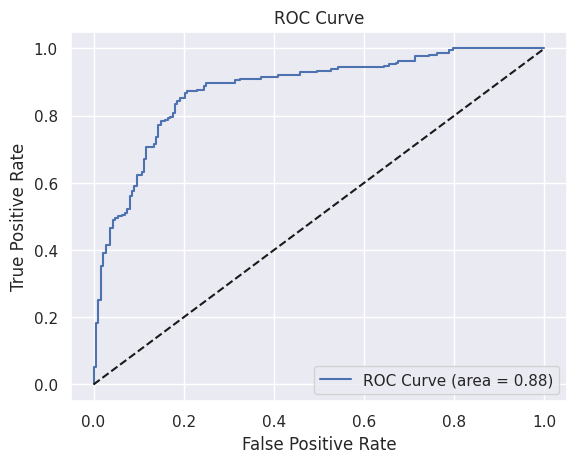

In [32]:
#rf
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve 및 AUC 계산
y_prob = rf_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ROC Curve 출력
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# 수고하셨습니다.